## KNN implementation on 220 Band AVIRIS Hyperspectral Image of Indian Pine Test Site 3 
## --> PCA (Library) with standardization
## --> KNN Library Code
## --> k = best value of k for maximum frequency

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
%matplotlib inline

## reading .lan file

In [2]:
#import the package
from spectral import *

In [3]:
data = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan')

In [4]:
data

	Data Source:   'D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3C.lan'
	# Rows:            145
	# Samples:         145
	# Bands:           220
	Interleave:        BIL
	Quantization:  16 bits
	Data format:     int16

In [5]:
data.shape

(145, 145, 220)

In [6]:
data[:,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]],

       [[3344, 4388, 4334, ..., 1030, 1006, 1015],
        [3515, 4264, 4592, ..., 1039, 1015, 1020],
        [3518, 4268, 4423, ..., 1026, 1015, 1020],
        ...,
        [3859, 4512, 4605, ..., 1035, 1015,  996],
        [3686, 4264, 4690, ..., 1012, 1020, 1014],
        [3512, 4268, 4597, ..., 1019, 1016, 1010]],

       [[3512, 4146, 4416, ..., 1029, 1025, 1010],
        [3344, 4389, 4416, ..., 1021, 1011, 1000],
        [3512, 4273, 4420, ..., 1033, 1010, 1014],
        ...,
        [3341, 4266, 4509, ..., 1025, 1010, 1005],
        [3344, 4262, 4496, ..., 1029, 1020, 1005],
        [3510, 4142, 4230, ..., 1025, 1011, 1010]],

       ...,

       [[3324, 3728, 400

In [7]:
# data[0] won't work here
data[0,:,:]

array([[[3172, 4142, 4506, ..., 1020, 1020, 1005],
        [3348, 4266, 4502, ..., 1029, 1020, 1000],
        [3687, 4266, 4421, ..., 1030, 1016, 1009],
        ...,
        [3341, 3890, 4320, ..., 1021, 1015, 1025],
        [3170, 4130, 4320, ..., 1024, 1020, 1011],
        [3172, 3890, 4316, ..., 1034, 1016, 1015]]], dtype=int16)

In [8]:
data[0,0,:]

array([[[3172, 4142, 4506, 4279, 4782, 5048, 5213, 5106, 5053, 4750,
         4816, 4769, 4610, 4805, 4828, 4861, 4767, 4624, 4549, 4463,
         4462, 4446, 4445, 4336, 4381, 4319, 4207, 4305, 4311, 3991,
         4168, 3942, 4061, 4365, 4318, 4252, 4869, 5284, 5055, 3591,
         5175, 5217, 5058, 4969, 4721, 4291, 4555, 4886, 4868, 4806,
         4783, 4811, 4709, 3903, 3795, 3715, 3359, 2130, 2269, 2480,
         3145, 3626, 4060, 4296, 4211, 4225, 4157, 4133, 4082, 4048,
         3935, 3843, 3784, 3642, 3271, 2707, 1707, 1564, 1838, 1719,
         2229, 2764, 2919, 2873, 2977, 2913, 3034, 3051, 3124, 3101,
         3033, 2713, 2740, 2947, 2706, 2834, 2856, 2683, 2400, 2229,
         1822, 1542, 1097, 1029, 1020, 1026, 1009, 1011, 1047, 1069,
         1100, 1122, 1259, 1365, 1261, 1374, 1630, 1851, 2028, 2130,
         2170, 2205, 2214, 2204, 2100, 2106, 2146, 2089, 2078, 2134,
         2127, 2074, 2057, 2045, 2003, 1999, 1959, 1924, 1883, 1843,
         1781, 1716, 1698, 1645, 1

In [9]:
# (0,0) pixel value of band 0
data[0,0,0]

3172

In [10]:
# (0,0) pixel value of band 1
data[0,0,1]

4142

In [11]:
# (0,0) pixel value of band 219
data[0,0,219]

1005

In [12]:
ground_truth = open_image('D:\Academic Thesis Papers\Thesis Report 5\sample-data-master\92AV3GT.GIS').read_band(0)

In [13]:
ground_truth

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [14]:
ground_truth_data = ground_truth
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

## Preparing Data by making the band number as features and pixel number as rows

In [15]:
dictionary = dict()
value = list()

for z in range(220):
    count = z + 1
    key = 'band_' + str(count)
    
    for x in range(145):
        for y in range(145):
            value.append(data[x,y,z])
    
    dictionary[key] = value
    value = list()
            
dictionary

{'band_1': [3172,
  3348,
  3687,
  3517,
  3514,
  3343,
  3343,
  3343,
  3346,
  3522,
  3858,
  3514,
  3343,
  3343,
  3343,
  3343,
  3343,
  3343,
  3346,
  3514,
  3341,
  3172,
  3343,
  3341,
  3167,
  3004,
  3514,
  3341,
  3170,
  3170,
  3170,
  3167,
  3002,
  3338,
  2996,
  3004,
  3514,
  3343,
  3346,
  3517,
  3517,
  3514,
  3348,
  3687,
  3514,
  3346,
  3514,
  3343,
  3346,
  3514,
  3343,
  3343,
  3343,
  3348,
  3687,
  3511,
  3172,
  3346,
  3514,
  3346,
  3519,
  3690,
  3690,
  3690,
  3693,
  3858,
  3517,
  3517,
  3511,
  3170,
  3175,
  3514,
  3343,
  3343,
  3341,
  3172,
  3341,
  3167,
  2999,
  3170,
  3162,
  2657,
  3170,
  3167,
  3002,
  3341,
  3172,
  3338,
  2999,
  3170,
  3167,
  2996,
  2999,
  3167,
  3002,
  3341,
  3178,
  3690,
  3687,
  3517,
  3517,
  3514,
  3343,
  3346,
  3511,
  3175,
  3514,
  3343,
  3343,
  3343,
  3341,
  3172,
  3343,
  3346,
  3511,
  3172,
  3341,
  3170,
  3178,
  3685,
  3343,
  3341,
  3175,
  3517

In [16]:
dictionary['band_1']

[3172,
 3348,
 3687,
 3517,
 3514,
 3343,
 3343,
 3343,
 3346,
 3522,
 3858,
 3514,
 3343,
 3343,
 3343,
 3343,
 3343,
 3343,
 3346,
 3514,
 3341,
 3172,
 3343,
 3341,
 3167,
 3004,
 3514,
 3341,
 3170,
 3170,
 3170,
 3167,
 3002,
 3338,
 2996,
 3004,
 3514,
 3343,
 3346,
 3517,
 3517,
 3514,
 3348,
 3687,
 3514,
 3346,
 3514,
 3343,
 3346,
 3514,
 3343,
 3343,
 3343,
 3348,
 3687,
 3511,
 3172,
 3346,
 3514,
 3346,
 3519,
 3690,
 3690,
 3690,
 3693,
 3858,
 3517,
 3517,
 3511,
 3170,
 3175,
 3514,
 3343,
 3343,
 3341,
 3172,
 3341,
 3167,
 2999,
 3170,
 3162,
 2657,
 3170,
 3167,
 3002,
 3341,
 3172,
 3338,
 2999,
 3170,
 3167,
 2996,
 2999,
 3167,
 3002,
 3341,
 3178,
 3690,
 3687,
 3517,
 3517,
 3514,
 3343,
 3346,
 3511,
 3175,
 3514,
 3343,
 3343,
 3343,
 3341,
 3172,
 3343,
 3346,
 3511,
 3172,
 3341,
 3170,
 3178,
 3685,
 3343,
 3341,
 3175,
 3517,
 3517,
 3517,
 3517,
 3519,
 3690,
 3693,
 3858,
 3519,
 3687,
 3522,
 3861,
 3687,
 3517,
 3514,
 3346,
 3514,
 3338,
 3002,
 3341,

In [17]:
np.array(dictionary['band_1'])

array([3172, 3348, 3687, ..., 3153, 3155, 3323], dtype=int16)

In [18]:
np.array(dictionary['band_1']).shape

(21025,)

In [19]:
np.array(dictionary['band_1']).reshape(145,145)

array([[3172, 3348, 3687, ..., 3341, 3170, 3172],
       [3344, 3515, 3518, ..., 3859, 3686, 3512],
       [3512, 3344, 3512, ..., 3341, 3344, 3510],
       ...,
       [3324, 2983, 2988, ..., 3332, 3498, 3156],
       [3161, 3495, 2988, ..., 3156, 3159, 3329],
       [2979, 2977, 2814, ..., 3153, 3155, 3323]], dtype=int16)

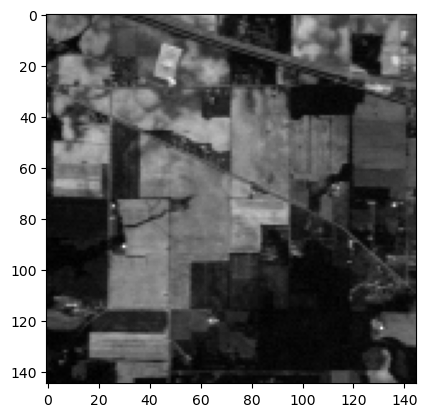

In [20]:
plt.imshow(np.array(dictionary['band_32']).reshape(145,145),cmap='gray')
plt.show()

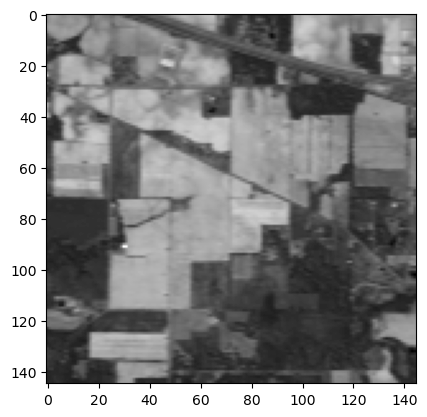

In [21]:
plt.imshow(np.array(dictionary['band_122']).reshape(145,145),cmap='gray')
plt.show()

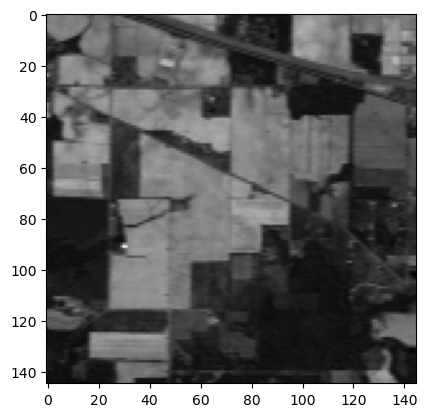

In [22]:
plt.imshow(np.array(dictionary['band_183']).reshape(145,145),cmap='gray')
plt.show()

## Preparing ground truth data as target data

In [23]:
ground_truth_data

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [24]:
ground_truth_data.shape

(145, 145)

In [25]:
# number of unique values and their count

diff = dict()

for i in range(145):
    for j in range(145):
        if ground_truth_data[i,j] not in diff:
            diff[ground_truth_data[i,j]] = 1
        else:
            diff[ground_truth_data[i,j]] = diff[ground_truth_data[i,j]] + 1
diff

{3: 834,
 0: 10659,
 15: 380,
 11: 2468,
 12: 614,
 5: 497,
 10: 968,
 14: 1294,
 16: 95,
 2: 1434,
 4: 234,
 8: 489,
 6: 747,
 9: 20,
 1: 54,
 7: 26,
 13: 212}

So there are total 17 classes in this ground truth data

In [26]:
ground_truth_data.reshape(21025,1)

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [27]:
target = ground_truth_data.reshape(21025,1)
target

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]], dtype=int8)

In [28]:
print(target.shape)
print(target.ndim)

(21025, 1)
2


but still, 'target' remains as 2D since it's shape is (21025,1). So we need 'target' to be 1D

In [29]:
target = ground_truth_data.reshape(21025,)
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [30]:
print(target.shape)
print(target.ndim)

(21025,)
1


# making df

In [31]:
df = pd.DataFrame(dictionary)

In [32]:
df.head()

band_1  band_2  band_3  band_4  band_5  band_6  band_7  band_8  band_9  \
0    3172    4142    4506    4279    4782    5048    5213    5106    5053   
1    3348    4266    4502    4426    4853    5249    5352    5353    5347   
2    3687    4266    4421    4498    5019    5293    5438    5427    5383   
3    3517    4258    4603    4493    4958    5234    5417    5355    5349   
4    3514    4018    4675    4417    4886    5117    5215    5096    5098   

   band_10  ...  band_211  band_212  band_213  band_214  band_215  band_216  \
0     4750  ...      1094      1090      1112      1090      1062      1069   
1     5065  ...      1108      1104      1117      1091      1079      1085   
2     5132  ...      1111      1114      1114      1100      1065      1092   
3     5096  ...      1122      1108      1109      1109      1071      1088   
4     4834  ...      1110      1107      1112      1094      1072      1087   

   band_217  band_218  band_219  band_220  
0      1057      1020      1020      1005  
1      1064      1029      1020      1000  
2      1061      1030      1016      1009  
3      1060      1030      1006      1005  
4      1052      1034      1019      1019  

[5 rows x 220 columns]

## Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [35]:
scaled_data = scaler.transform(df)

In [70]:
pd.DataFrame(scaled_data).describe().loc[['mean','std']]

0             1             2             3             4    \
mean  2.112167e-15  4.074067e-15  3.168207e-15  5.408806e-17  1.102418e-15   
std   1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   

               5             6             7             8             9    \
mean -4.625604e-16  2.642917e-15  6.732308e-16  8.546156e-16  1.232509e-15   
std   1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   

      ...           210           211           212           213  \
mean  ...  1.725685e-15 -1.273179e-15 -1.008663e-14 -1.667896e-15   
std   ...  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   

               214           215           216           217           218  \
mean  8.348222e-15 -1.660767e-15  3.070806e-15 -5.294124e-15 -2.074758e-14   
std   1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   

               219  
mean -2.521473e-14  
std   1.000024e+00  

[2 rows x 220 columns]

## PCA Implement

In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components=10)

In [38]:
pca.fit(scaled_data)

PCA(n_components=10)

In [39]:
x_pca = pca.transform(scaled_data)

In [40]:
x_pca

array([[ 10.32490961,   5.45215465,  -0.06076873, ...,  -1.46788487,
         -0.0588814 ,  -1.10313561],
       [ 13.08678871,  -1.261538  ,   1.62539377, ...,  -2.69371113,
          0.79418615,  -0.16522465],
       [ 14.29689888,  -3.32035749,   2.23945561, ...,  -0.75614769,
         -1.0803749 ,  -0.12112391],
       ...,
       [-15.51358577,  -3.7085103 ,   0.64816034, ...,  -1.21519546,
          0.89867929,  -0.49755453],
       [-15.70499093,   1.41184079,   1.15586042, ...,  -0.46746946,
         -1.31261351,  -0.2746866 ],
       [-15.76356738,   0.27399569,   1.09875647, ...,   1.1848599 ,
          0.43766809,  -0.12640478]])

In [41]:
pca.explained_variance_ratio_

array([0.64465308, 0.21338446, 0.02046963, 0.00834486, 0.00729691,
       0.00599536, 0.00495389, 0.00468158, 0.00446997, 0.00431972])

In [42]:
scaled_data.shape

(21025, 220)

In [43]:
x_pca.shape

(21025, 10)

Text(0, 0.5, 'PC2')

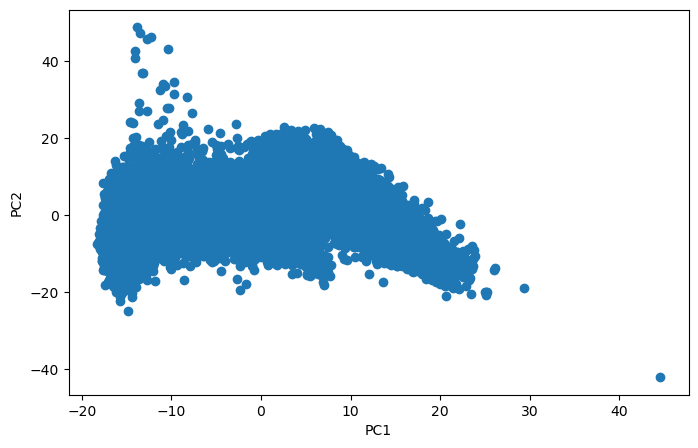

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'Second Principal Component')

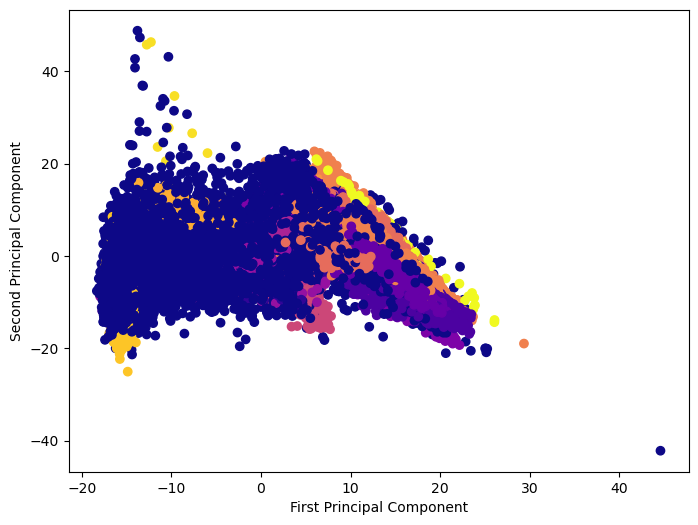

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=target,cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

<AxesSubplot:>

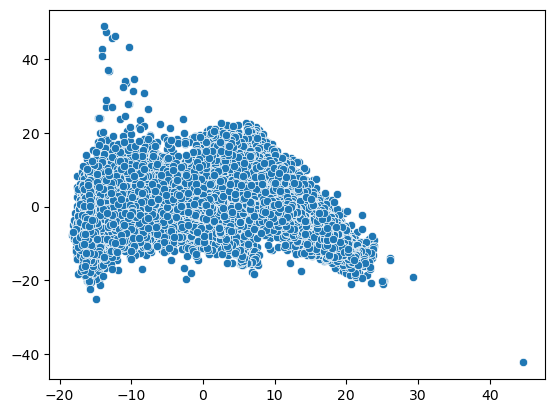

In [46]:
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1])

<AxesSubplot:>

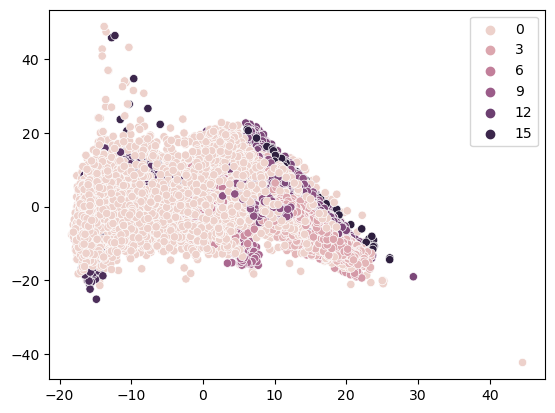

In [47]:
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1],hue=target)

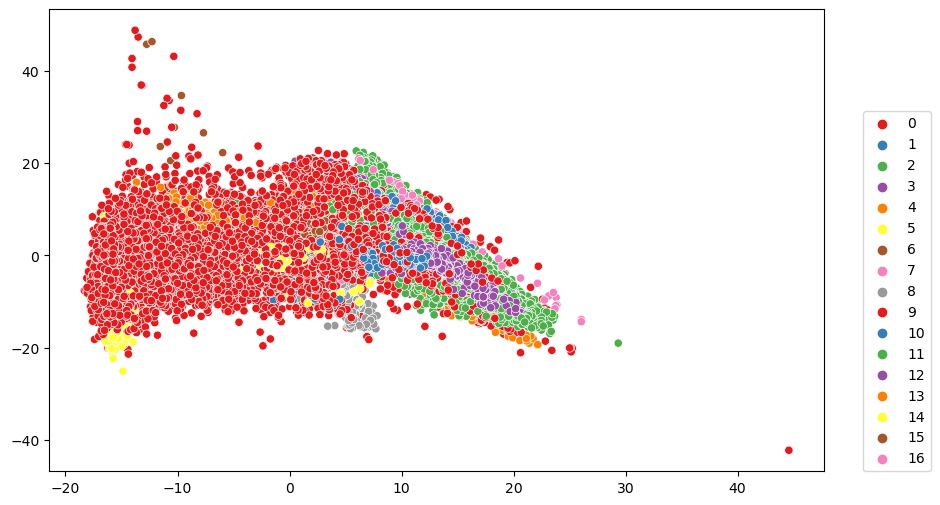

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = x_pca[:,0], y = x_pca[:,1],hue=target,palette='Set1')
plt.legend(loc=(1.05,0))

# KNN Implementation

In [49]:
name = list()
for i in range (x_pca.shape[1]):
    name.append('PC'+str(i+1))
name

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

In [50]:
df = pd.DataFrame(data = x_pca,columns=name)
df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      10.324910  5.452155 -0.060769 -1.625131 -2.259642 -0.402047 -0.684240   
1      13.086789 -1.261538  1.625394 -0.945614 -0.402103  0.956078 -0.771258   
2      14.296899 -3.320357  2.239456 -1.003034 -1.431438  1.126043  1.751197   
3      13.373844 -1.919310  2.174781 -1.717795 -3.441276  1.084745 -0.944561   
4      11.615055  2.597936  0.244948 -1.395894  0.448471  1.452766 -0.287806   
...          ...       ...       ...       ...       ...       ...       ...   
21020 -15.684587 -5.085826  1.007644 -1.179429 -0.777714  0.317003 -0.233947   
21021 -15.963153 -5.313534  1.068250 -1.065699  0.021991  1.782004 -2.610456   
21022 -15.513586 -3.708510  0.648160 -0.809102 -0.102794  0.051989 -0.950129   
21023 -15.704991  1.411841  1.155860 -1.116885 -0.425742  0.544728 -2.483533   
21024 -15.763567  0.273996  1.098756 -1.543546 -0.921567  0.862698  0.741742   

            PC8       PC9      PC10  
0     -1.467885 -0.058881 -1.103136  
1     -2.693711  0.794186 -0.165225  
2     -0.756148 -1.080375 -0.121124  
3      0.438247  1.092270  0.547249  
4     -0.969996  0.367473 -0.336781  
...         ...       ...       ...  
21020  0.035216  2.157516  0.677484  
21021  0.577565  0.863292  0.833816  
21022 -1.215195  0.898679 -0.497555  
21023 -0.467469 -1.312614 -0.274687  
21024  1.184860  0.437668 -0.126405  

[21025 rows x 10 columns]

In [51]:
target

array([3, 3, 3, ..., 0, 0, 0], dtype=int8)

In [52]:
df['target'] = target
df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      10.324910  5.452155 -0.060769 -1.625131 -2.259642 -0.402047 -0.684240   
1      13.086789 -1.261538  1.625394 -0.945614 -0.402103  0.956078 -0.771258   
2      14.296899 -3.320357  2.239456 -1.003034 -1.431438  1.126043  1.751197   
3      13.373844 -1.919310  2.174781 -1.717795 -3.441276  1.084745 -0.944561   
4      11.615055  2.597936  0.244948 -1.395894  0.448471  1.452766 -0.287806   
...          ...       ...       ...       ...       ...       ...       ...   
21020 -15.684587 -5.085826  1.007644 -1.179429 -0.777714  0.317003 -0.233947   
21021 -15.963153 -5.313534  1.068250 -1.065699  0.021991  1.782004 -2.610456   
21022 -15.513586 -3.708510  0.648160 -0.809102 -0.102794  0.051989 -0.950129   
21023 -15.704991  1.411841  1.155860 -1.116885 -0.425742  0.544728 -2.483533   
21024 -15.763567  0.273996  1.098756 -1.543546 -0.921567  0.862698  0.741742   

            PC8       PC9      PC10  target  
0     -1.467885 -0.058881 -1.103136       3  
1     -2.693711  0.794186 -0.165225       3  
2     -0.756148 -1.080375 -0.121124       3  
3      0.438247  1.092270  0.547249       3  
4     -0.969996  0.367473 -0.336781       3  
...         ...       ...       ...     ...  
21020  0.035216  2.157516  0.677484       0  
21021  0.577565  0.863292  0.833816       0  
21022 -1.215195  0.898679 -0.497555       0  
21023 -0.467469 -1.312614 -0.274687       0  
21024  1.184860  0.437668 -0.126405       0  

[21025 rows x 11 columns]

In [53]:
n = len(df.columns)
n

11

## Train Test Split

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop(df.columns[n-1],axis=1)
X

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      10.324910  5.452155 -0.060769 -1.625131 -2.259642 -0.402047 -0.684240   
1      13.086789 -1.261538  1.625394 -0.945614 -0.402103  0.956078 -0.771258   
2      14.296899 -3.320357  2.239456 -1.003034 -1.431438  1.126043  1.751197   
3      13.373844 -1.919310  2.174781 -1.717795 -3.441276  1.084745 -0.944561   
4      11.615055  2.597936  0.244948 -1.395894  0.448471  1.452766 -0.287806   
...          ...       ...       ...       ...       ...       ...       ...   
21020 -15.684587 -5.085826  1.007644 -1.179429 -0.777714  0.317003 -0.233947   
21021 -15.963153 -5.313534  1.068250 -1.065699  0.021991  1.782004 -2.610456   
21022 -15.513586 -3.708510  0.648160 -0.809102 -0.102794  0.051989 -0.950129   
21023 -15.704991  1.411841  1.155860 -1.116885 -0.425742  0.544728 -2.483533   
21024 -15.763567  0.273996  1.098756 -1.543546 -0.921567  0.862698  0.741742   

            PC8       PC9      PC10  
0     -1.467885 -0.058881 -1.103136  
1     -2.693711  0.794186 -0.165225  
2     -0.756148 -1.080375 -0.121124  
3      0.438247  1.092270  0.547249  
4     -0.969996  0.367473 -0.336781  
...         ...       ...       ...  
21020  0.035216  2.157516  0.677484  
21021  0.577565  0.863292  0.833816  
21022 -1.215195  0.898679 -0.497555  
21023 -0.467469 -1.312614 -0.274687  
21024  1.184860  0.437668 -0.126405  

[21025 rows x 10 columns]

In [56]:
y = df[df.columns[n-1]]
y

0        3
1        3
2        3
3        3
4        3
        ..
21020    0
21021    0
21022    0
21023    0
21024    0
Name: target, Length: 21025, dtype: int8

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [58]:
X_train

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
11564   4.172338  -3.803714 -2.114157  3.671840  0.884548 -1.096993 -2.631951   
6824   18.902898 -14.731802  2.254459 -1.089841 -2.022968  0.182327  1.423005   
13573  -2.318529  -0.658212 -1.831795  1.391102 -2.173741  0.539372  1.262862   
6494    6.864040   5.643525 -2.911628  1.109112  0.807909  0.346806 -0.835158   
15613 -16.079474 -11.129016  0.422924 -1.042815  2.346559  1.153834 -0.890466   
...          ...        ...       ...       ...       ...       ...       ...   
11284 -10.886097   0.906725 -0.315381  0.926649  0.407122 -1.467484  0.107208   
11964  13.546761  -6.817717  0.586221  0.814515  0.260895 -0.573475 -0.518892   
5390   11.268064  -2.511342  2.646738  0.680531 -0.130045  0.163768  0.388353   
860    17.688260  -5.254120  0.328017 -0.112259  0.043894  0.599550  0.487023   
15795  -8.335863   5.445009  3.334592  0.546254 -0.375725 -0.025653 -0.065389   

            PC8       PC9      PC10  
11564  1.013250 -2.194683 -0.785787  
6824  -0.665457 -1.200611 -1.798655  
13573  1.183203  1.372359  0.650046  
6494  -1.280268 -2.606093 -0.234142  
15613 -0.427387 -0.022588  0.547708  
...         ...       ...       ...  
11284  0.234713 -0.999996  0.037754  
11964 -0.951920 -0.280533 -1.872778  
5390  -0.906593  0.850432  0.599762  
860   -0.389975  1.781999 -1.475550  
15795 -1.022670 -2.463988 -1.239216  

[14717 rows x 10 columns]

In [59]:
X_test

PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
18460  15.555516  -4.059391  0.978012 -1.435901 -1.320204 -1.776397  0.017062   
8260    2.800169  -8.313858 -2.867457  3.210166 -1.245365 -0.246813 -1.195619   
4741  -15.411897   0.300563  1.534000 -1.366426  0.499958  2.241312  1.912672   
10117  -4.500720   4.780124  0.857501  1.916240 -0.953432 -1.661442 -1.411823   
10596 -16.331522  -8.544690  2.173768 -2.827724  0.803747  2.161596 -0.532016   
...          ...        ...       ...       ...       ...       ...       ...   
5248   17.779785  -6.033103  1.381433 -0.616205 -1.282861  0.913192 -0.730073   
4455  -15.430442  -0.940134  0.344148 -0.831956 -0.950131 -0.157599  0.850455   
9418   -4.880884  -5.808948 -0.773691  3.456848  0.431653 -0.156035 -0.995501   
9185   17.909888  -5.412061  0.237462 -0.673196  0.246602  0.593083 -0.614303   
435     8.678727  10.673732 -1.401232 -2.001078 -1.246945 -2.729632 -1.533185   

            PC8       PC9      PC10  
18460 -0.313573  1.234659  1.155495  
8260   2.139990  0.504566  0.542054  
4741   0.293789 -1.908004 -1.446951  
10117 -1.547361  0.618827 -0.212285  
10596  0.593714  0.132194  0.792187  
...         ...       ...       ...  
5248   0.594606 -0.014331  0.288608  
4455   0.475662  0.576561 -2.485100  
9418   0.217796  0.539471 -1.902785  
9185  -1.539614 -0.472073  1.018122  
435   -0.367599 -0.026661  1.140607  

[6308 rows x 10 columns]

## Finding the Best Value of K

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [61]:
k = math.floor(math.sqrt(len(y_train)))

if k%2==0 :
    k = k + 1

print(k)

121


In [62]:
k_value = k

In [63]:
k_list = list()
accuracy_list = list()

for k in range(k_value):
    k = k + 1
    k_list.append(k)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred) * 100
    accuracy_list.append(accuracy)

Text(0, 0.5, 'Accuracy')

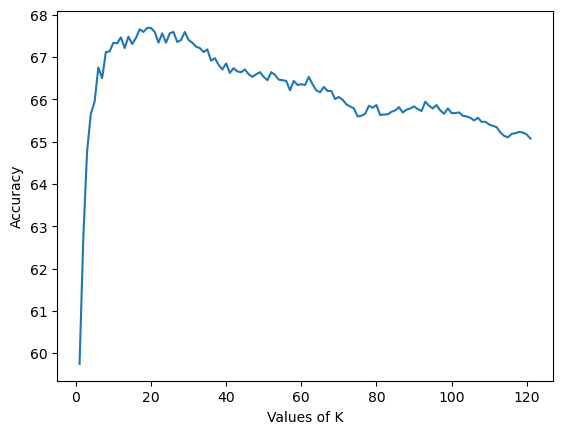

In [64]:
plt.plot(k_list,accuracy_list)
plt.xlabel('Values of K')
plt.ylabel('Accuracy')

In [65]:
max_accuracy = 0

for k in range(k_value):
    if accuracy_list[k] > max_accuracy:
        max_accuracy = accuracy_list[k]
        k_best = k_list[k]

print('Maximum Accuracy :',max_accuracy)
print('Best value of K :',k_best)

Maximum Accuracy : 67.69181991122383
Best value of K : 19


In [66]:
max_accuracy = max(accuracy_list)
print(max_accuracy)
max_index = accuracy_list.index(max(accuracy_list))
print(max_index)

k_best = k_list[max_index]
print(k_best)

67.69181991122383
18
19
